<a href="https://colab.research.google.com/github/dp2292/CP01-Data-Alchemists/blob/Dhruv/SBT_Graphs_Dhruv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary

## Model Results

**1. Predicting the duration of the trip**

LinearRegression:\
RidgeRegression (alpha = 1):\
LassoRegression (alpha = 0.1):\
ElasticNetRegression (alpha = 0.1, l1_ratio = 0.99):\
RandomForestRegression:\
XGBRegression:\
LGBMRegression:\
Neural Network:

**2. Predicting the temperature at the pickup time**

LinearRegression:\
RidgeRegression (alpha = 1):\
LassoRegression (alpha = 0.1):\
ElasticNetRegression (alpha = 0.1, l1_ratio = 0.99):\
RandomForestRegression:\
XGBRegression:\
LGBMRegression:

## Flow of end-to-end pipeline:

**1. Data Analysis and Pre-processing**
  - Extracting the zip file directly from gdrive to save time using gdown.
  - Checked for null values in any of the 25 features. (1 Feature - index dropped due to its irrelevance)
  - Removed data objects with haversine = 0 (as its not useful in predicting the duration of the trip)
  - Removed duplicate data objects
  - Removed outliers from the important features for both the models

**2. Data Visualization and Inferences**
  - Features are explained in more details with its distribution and patterns.
  - Various inferences are made with the help of Box Plots, Histograms, Bar graphs, count plots, violin plots and scatter plots.

**3. Modelling and results**
  - 2 models have been trained - For predicting the duration of trip and predicting the temperature.
  - Various models are trained for selected highly relevant features like LinearRegression, XGBRegression, LGBMRegression, RandomForestRegression, Lasso, Ridge and ElasticNetRegression.



# Section 1: Data Pre-processing

Data preprocessing in data mining is a crucial step that involves cleaning, transforming, and refining raw data to ensure its quality and consistency. This process addresses issues like missing values and outliers while harmonizing data from different sources. It also improves the data's suitability for analysis by selecting, extracting, and engineering features. By doing so, data preprocessing enhances the accuracy and interpretability of analytical models, leading to more reliable and actionable insights of our dataset.

In [ ]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
!gdown --id 1RfhNYBd7g70LdgJROvx8iPGygPhiGQLZ -O data/

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RfhNYBd7g70LdgJROvx8iPGygPhiGQLZ
To: /content/data/CP01.zip
100% 630M/630M [00:09<00:00, 66.3MB/s]


We employed the above command to efficiently access and retrieve data from Google Drive due to the substantial file size, streamlining our process.

In [ ]:
!unzip /content/data/CP01.zip -d /content/data

Archive:  /content/data/CP01.zip
replace /content/data/For_modeling.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/data/cleaned_seoul_bike_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_compressed = pd.read_csv('/content/data/For_modeling.csv',
                  dtype={
                      'Duration': 'int32',
                      'Distance': 'int32',
                      'PLong': 'float32',
                      'PLatd': 'float32',
                      'DLong': 'float32',
                      'Haversine':'float32',
                      'Pmonth':'int8',
                      'Pday':'int8',
                      'Phour':'int8',
                      'Pmin':'int8',
                      'PDweek':'int8',
                      'Dmonth':'int8',
                      'Dday':'int8',
                      'Dhour':'int8',
                      'Dmin':'int8',
                      'DDweek':'int8',
                      'Temp':'float32',
                      'Precip':'float32',
                      'Wind':'float32',
                      'Solar':'float32',
                      'Snow':'float32',
                      'GroundTemp':'float32',
                      'Dust':'float32'
                  },index_col=0
                  )
data = pd.read_csv('data/For_modeling.csv',index_col=0)
data = data.reset_index().drop(columns=['index'])
data.head(5)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int64  
 1   Distance    int64  
 2   PLong       float64
 3   PLatd       float64
 4   DLong       float64
 5   DLatd       float64
 6   Haversine   float64
 7   Pmonth      int64  
 8   Pday        int64  
 9   Phour       int64  
 10  Pmin        int64  
 11  PDweek      int64  
 12  Dmonth      int64  
 13  Dday        int64  
 14  Dhour       int64  
 15  Dmin        int64  
 16  DDweek      int64  
 17  Temp        float64
 18  Precip      float64
 19  Wind        float64
 20  Humid       float64
 21  Solar       float64
 22  Snow        float64
 23  GroundTemp  float64
 24  Dust        float64
dtypes: float64(13), int64(12)
memory usage: 1.8 GB


# Seoul Trip Data Features


## Statistics of Data



Here is an overview of the parameters and characteristics present in the Seoul trip dataset for consideration:


| Abbreviation | Parameters/Features         | Type        | Measurement                  |
|--------------|-----------------------------|-------------|------------------------------|
| Duration     | Trip duration               | Continuous  | |
| Distance     | Trip distance               | Continuous  | |
| PLong        | Pickup longitude            | Continuous  | Radians                      |
| PLatd        | Pickup latitude             | Continuous  | Radians                      |
| DLong        | Dropoff longitude           | Continuous  | Radians                      |
| DLatd        | Dropoff latitude            | Continuous  | Radians                      |
| Haversine    | Haversine distance          | Continuous  | Kilometres                   |
| Pmonth       | Pickup month                | Categorical | January, February, March, … December |
| Pday         | Pickup day                  | Categorical | 1, 2, 3, … 31               |
| Phour        | Pickup hour                 | Categorical | 0, 1, 2, … 23               |
| Pmin         | Pickup minute               | Continuous  | 1, 2, 3, … 60               |
| PDweek       | Pickup day of the week      | Categorical | Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday |
| Dmonth       | Dropoff month               | Categorical | January, February, March, … December |
| Dday         | Dropoff day                 | Categorical | 1, 2, 3, … 31               |
| Dhour        | Dropoff hour                | Categorical | 0, 1, 2, … 23               |
| Dmin         | Dropoff minute              | Continuous  | 1, 2, 3, … 60               |
| DDweek       | Dropoff day of the week     | Categorical | Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday |
| Temp         | Temperature                 | Continuous  | °C                           |
| Precip       | Precipitation               | Continuous  | Mm                           |
| Wind         | Wind speed                  | Continuous  | m/s                          |
| Humd         | Humidity                    | Continuous  | %                            |
| Solar        | Solar radiation             | Continuous  | MJ/m2                        |
| Snow         | Snowfall                    | Continuous  | cm                           |
| GroundTemp   | Ground temperature          | Continuous  | °C                           |
| Dust         | 1-hour average fine dust concentration | Continuous | ㎍/㎥             |


In [ ]:
print(data.isna().sum().sort_values(ascending=False))

Duration      0
Dday          0
GroundTemp    0
Snow          0
Solar         0
Humid         0
Wind          0
Precip        0
Temp          0
DDweek        0
Dmin          0
Dhour         0
Dmonth        0
Distance      0
PDweek        0
Pmin          0
Phour         0
Pday          0
Pmonth        0
Haversine     0
DLatd         0
DLong         0
PLatd         0
PLong         0
Dust          0
dtype: int64


In [ ]:
data.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,...,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,3.713519e+03,3.754761e+01,1.269908e+02,3.754770e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,1.437801e+01,...,2.999278e+01,2.945771e+00,1.856201e+01,1.784856e-02,1.819274e+00,5.397565e+01,7.300679e-01,9.948924e-03,2.072376e+01,3.245798e+01
std,2.504333e+01,3.956611e+03,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,...,1.730960e+01,1.977624e+00,9.498075e+00,3.736282e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,...,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,2.280000e+03,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,...,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,...,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,...,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


In [ ]:
data_with_zero_displacement = data[data['Haversine']==0]
data_with_zero_displacement.head(5)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,37.544666,126.888359,37.544666,126.888359,0.0,1,1,0,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
26,18,1600,37.556610,126.898018,37.556610,126.898018,0.0,1,1,0,...,27,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
139,2,10,37.575970,126.983063,37.575970,126.983063,0.0,1,1,0,...,40,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
159,43,1940,37.548222,127.067879,37.548222,127.067879,0.0,1,1,0,...,26,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
206,13,490,37.609566,126.930977,37.609566,126.930977,0.0,1,1,0,...,5,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [ ]:
data_with_zero_displacement.shape

(955083, 25)

In [ ]:
data.shape

(9601139, 25)

Out of a total of 9,601,139 recorded trips, 955,083 of them are classified as round-trips, where the rider initiates and concludes the journey at the same location. From a logical standpoint, the inclusion of such data in predictive modeling for future bike trip durations between distinct points seems unwarranted. This is due to the fact that round-trip data offers limited value for inferring the rider's travel patterns and behavior during the course of the journey, as the origin and destination points are identical. Consequently, this subset of data lacks the necessary variability and insights to contribute meaningfully to the prediction of bike trip durations between distinct points.

In [ ]:
# Check if pickup and dropoff coordinates are the same
same_coordinates_mask = np.logical_and(data['PLong'] == data['DLong'], data['PLatd'] == data['DLatd'])

# Filter the data based on both conditions
filtered_data = data[~(same_coordinates_mask & (data['Haversine'] == 0))]

In [ ]:
filtered_data.shape

(8646056, 25)

In [ ]:
# removing the tuples for which haversine == 0
filtered_data = data[data['Haversine'] != 0]

In [ ]:
filtered_data.shape

(8646056, 25)

## Verifying all of the features' values

In [ ]:
pd.set_option('display.max_columns', None)
filtered_data.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06
mean,2.314345e+01,3.489543e+03,3.754772e+01,1.269909e+02,3.754782e+01,1.269908e+02,2.076918e+00,7.602102e+00,1.578030e+01,1.423248e+01,2.912769e+01,2.916600e+00,7.602499e+00,1.577990e+01,1.427496e+01,3.003549e+01,2.918615e+00,1.837109e+01,1.814095e-02,1.806268e+00,5.428914e+01,7.116840e-01,1.020934e-02,2.044014e+01,3.247510e+01
std,2.286414e+01,3.703603e+03,4.430949e-02,8.236528e-02,4.435297e-02,8.310713e-02,1.998044e+00,2.710842e+00,8.746445e+00,6.334764e+00,1.725796e+01,1.963908e+00,2.710829e+00,8.746214e+00,6.535078e+00,1.730486e+01,1.965282e+00,9.588562e+00,3.800871e-01,9.711955e-01,1.743514e+01,9.070460e-01,1.648211e-01,1.270838e+01,2.412606e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,2.088959e-02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,7.000000e+00,1.200000e+03,3.751424e+01,1.269201e+02,3.751424e+01,1.269196e+02,8.277592e-01,6.000000e+00,8.000000e+00,9.000000e+00,1.400000e+01,1.000000e+00,6.000000e+00,8.000000e+00,9.000000e+00,1.500000e+01,1.000000e+00,1.200000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.120000e+01,1.600000e+01
50%,1.500000e+01,2.180000e+03,3.754769e+01,1.269943e+02,3.754707e+01,1.269943e+02,1.404650e+00,8.000000e+00,1.600000e+01,1.600000e+01,2.900000e+01,3.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,3.000000e+01,3.000000e+00,1.990000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.500000e-01,0.000000e+00,2.090000e+01,2.700000e+01
75%,3.100000e+01,4.280000e+03,3.757324e+01,1.270618e+02,3.757328e+01,1.270624e+02,2.556391e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.400000e+01,5.000000e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.500000e+01,5.000000e+00,2.540000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.230000e+00,0.000000e+00,2.840000e+01,4.200000e+01
max,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


### Checks:
1. `Duration`: check for values that aren't too big or negative.
There are no trips found with such values of duration.
2. `Distance`: check for no negative distances or extreme outliers. None found.
3. `PLong` and `DLong`: Check that longitude values are within the valid range of -180 to 180 degrees. None found.
4. `PLatd` and `DLatd`: Check that latitude values are within the valid range of -90 to 90 degrees. None found.
5. `Haversine`: computed from PLong, DLong, PLatd and DLatd.
6. `Pmonth, Pday, Phour, Pmin, PDweek, Dmonth, Dday, Dhour, Dmin, DDweek`: Check for months (1-12), days (1-31), hours (0-23), minutes (0-59), and days of the week (0-6). Everything is in check.
7. `Temp, Precip, Wind, Humid, Solar, Snow, GroundTemp, Dust`: Check for unrealistic values and outliers based on current known range for these weather parameters.

**Check for duplicate values**


In [ ]:
filtered_data.duplicated().value_counts()

False    8636811
True        9245
dtype: int64

This gives an indication that out of 8646056 tupples, 9245 tupples are duplicates.

In [ ]:
#Remove all duplicates
filtered_data.drop_duplicates(inplace=True)
print("Dataset size after removing duplicates:", filtered_data.shape)

Dataset size after removing duplicates: (8636811, 25)


<ipython-input-9-ca0abfc58edb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop_duplicates(inplace=True)


Removing outlier data from filtered_data

In [ ]:
columns_to_check = ['Distance', 'Haversine', 'Dhour', 'Phour', 'Temp']

# Calculate the quartiles and IQR for the specified columns
Q1 = filtered_data[columns_to_check].quantile(0.25)
Q3 = filtered_data[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for outliers in each column
outliers_mask = ((filtered_data[columns_to_check] < lower_bound) | (filtered_data[columns_to_check] > upper_bound)).any(axis=1)

# Apply the mask to remove rows with outliers
filtered_data = filtered_data[~outliers_mask]


In [ ]:
filtered_data.shape

(7652385, 25)

# Section 2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) serves as a fundamental and indispensable preliminary step in the realm of data mining for several compelling reasons.

*   EDA facilitates a comprehensive understanding of the inherent structure and characteristics of the dataset, allowing us to identify patterns, anomalies, and potential data quality issues. This critical insight guides subsequent data preprocessing and feature engineering efforts, ensuring the dataset's readiness for modeling.
*   EDA aids in the selection of relevant variables by revealing their correlations, distributions, and statistical properties, helping us make informed decisions about feature inclusion or exclusion in predictive models.
*  Additionally, EDA plays a pivotal role in hypothesis generation, enabling us to formulate meaningful research questions and hypotheses based on initial observations.
*  EDA assists in the identification of outliers and extreme values, which can significantly impact model performance and decision-making processes.

Overall, EDA acts as the cornerstone of the data mining process, providing the necessary foundation for robust and accurate model development and ultimately enhancing the model's data-driven decision-making capabilities.

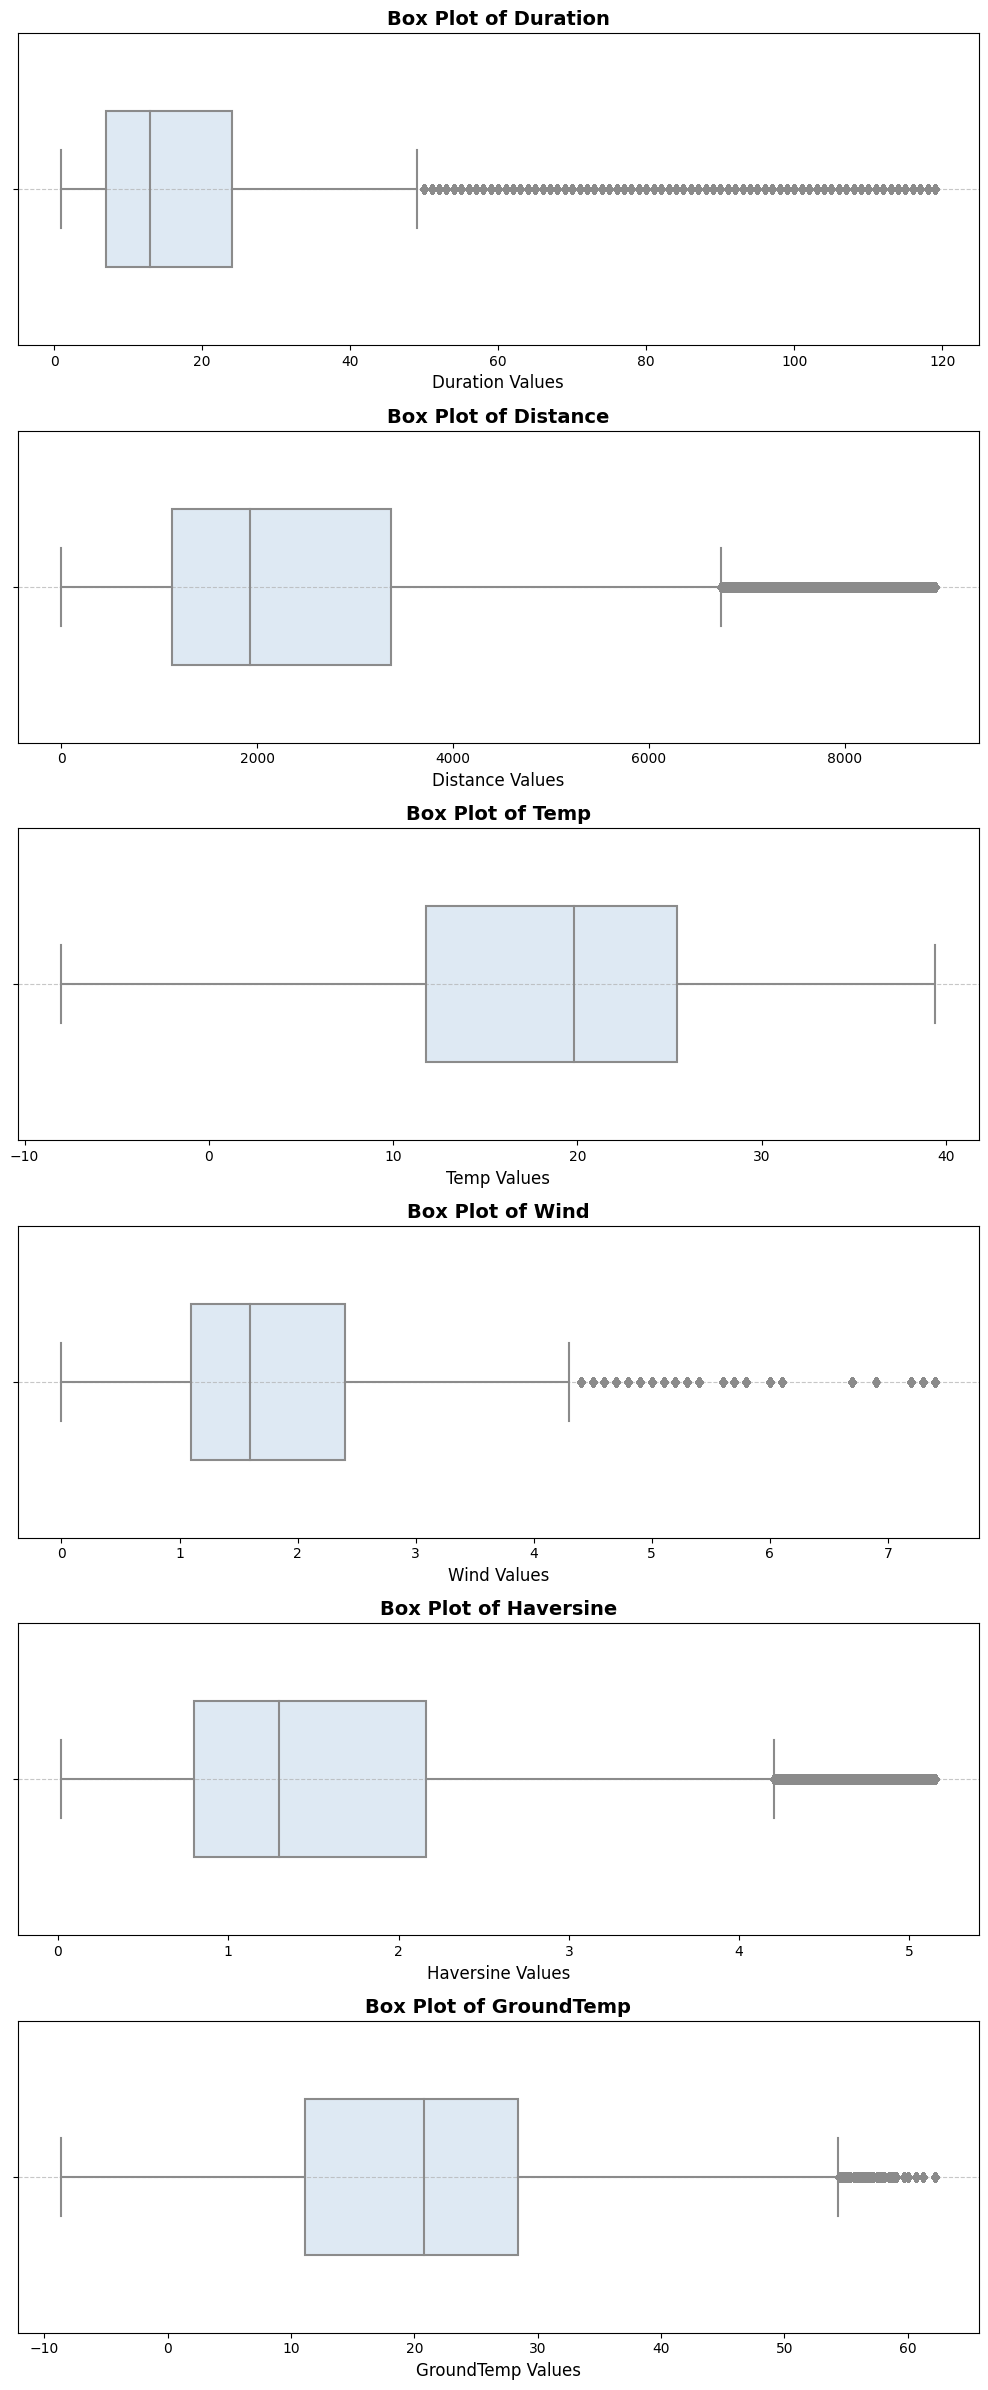

In [ ]:
columns_to_plot = ['Duration', 'Distance', 'Temp', 'Wind', 'Haversine', 'GroundTemp']

num_plots = len(columns_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 4 * num_plots))

color_palette = sns.color_palette("Blues")

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.boxplot(x=filtered_data[column], ax=ax, color=color_palette[0], width=0.5, linewidth=1.5)
    ax.set_title(f'Box Plot of {column}', fontsize=14, fontweight='bold')
    ax.set_xlabel(f'{column} Values', fontsize=12)
    ax.set_ylabel('')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




1.  Duration Boxplot:
      *   The box plot for the 'Duration' column shows that the distribution is right-skewed, with a longer tail on the right side.
      *   Most trip durations fall within a relatively short range, as indicated by the size of the box.
      *   There are some outliers on the longer duration side, suggesting that there are occasional significantly longer trips.

2.   Distance Boxplot:
      *   The 'Distance' box plot demonstrates a similar right-skewed distribution, with a longer tail on the right side.
      *   The majority of bike trips cover relatively short distances, as indicated by the box size.
      *   There are some outliers on the longer distance side, indicating a few bike trips that cover a significantly greater distance.

3.   Temperature Boxplot:
      *   The box plot for 'Temp' reveals the distribution of temperature values during the recorded bike trips.
      *   The data appears to be relatively evenly distributed, with no significant skewness.
      *   There are no apparent outliers, suggesting that the temperature values are within a reasonable range for bike trips.
4.   Wind Boxplot:
      *  The 'Wind' box plot illustrates the distribution of wind speed or related metrics during bike trips.
      *   The distribution seems to be relatively symmetrical, with no strong skewness in either direction.
      *   There are a few outliers on the higher wind speed side, indicating instances of potentially windy conditions during some trips.

5.   Haversine Boxplot:
      *  The 'Haversine' box plot represents the calculated Haversine distances, which are commonly used to measure distances between two points on Earth's surface.
      *   The distribution is right-skewed, with a longer tail on the right side.
      *   Most trips have relatively short Haversine distances, suggesting that they are local or within a moderate radius.
      *   Some outliers on the longer distance side indicate a few trips covering substantial geographical distances.

6.   Ground Temperature Boxplot:
      *  The box plot for 'GroundTemp' provides insights into the distribution of ground temperature values.
      *   The data appears to be relatively evenly distributed, with no significant skewness.
      *   There are no apparent outliers, indicating that ground temperature values are within a reasonable range for bike trips.









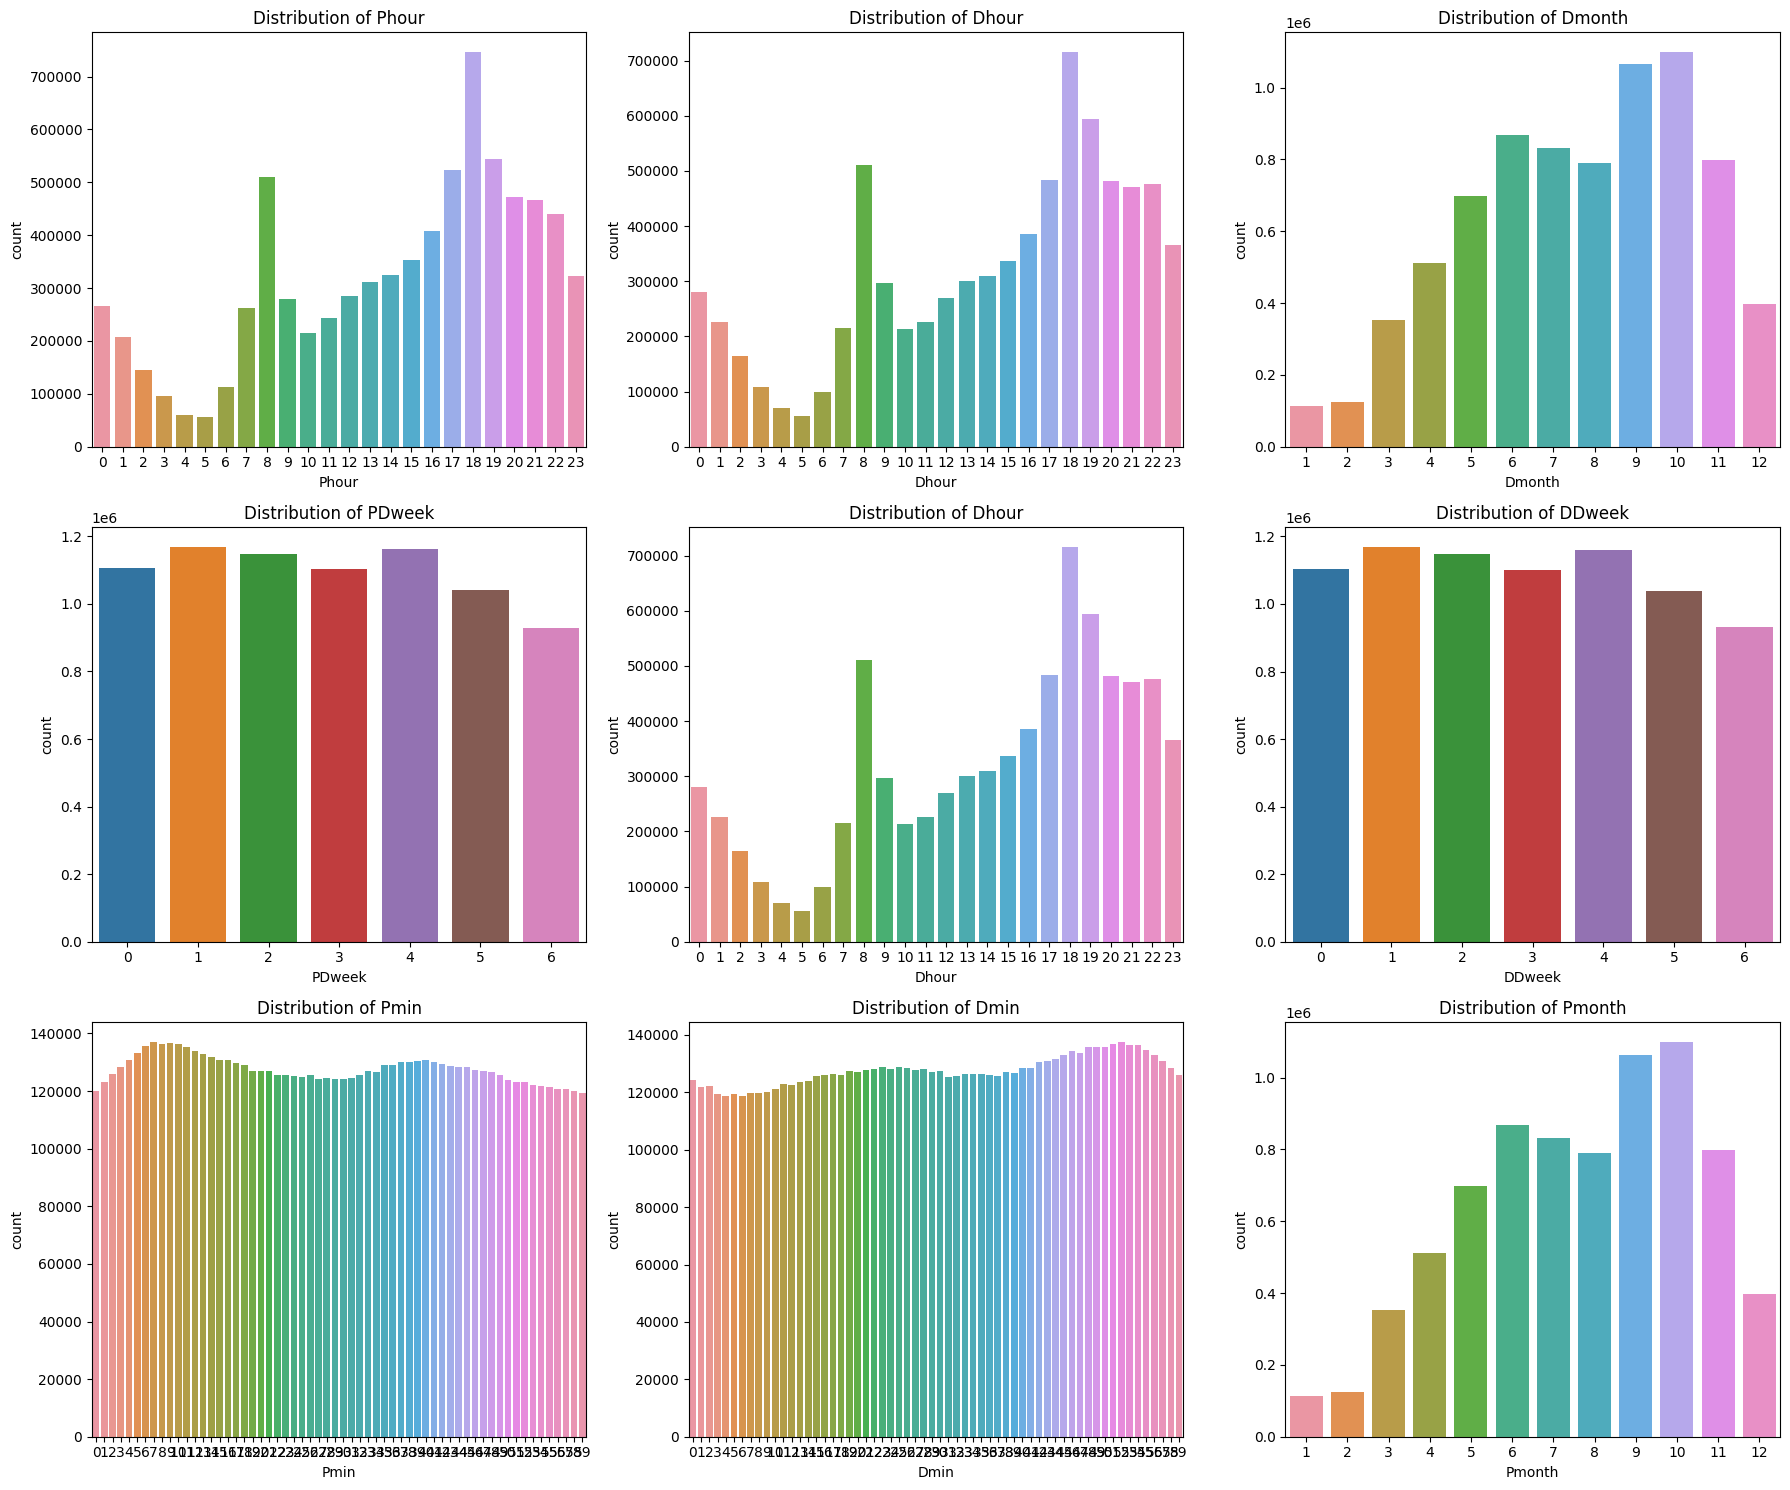

In [ ]:
col_names = ['Phour', 'Dhour','Dmonth', 'PDweek', 'Dhour', 'DDweek', 'Pmin', 'Dmin','Pmonth']

# Set up subplots with adjusted plot size
fig, axes = plt.subplots(3,3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(col_names):
    sns.countplot(x=filtered_data[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

1.   Pickup hours(Phour) Distribution:
        
        This plot shows the frequency of bike pickups during different hours of the day. It helps us understand when most bike trips are initiated, which provides insights into peak usage times. It shows that the major pickup and drops are during the office going hours in the morning and evening.
2.   Drop-off hours(Dhour) Distribution:

        This plot illustrates the frequency of bike drop-offs at different hours. Understanding drop-off patterns can be valuable for analyzing when riders typically complete their journeys. We can see that the plots for Phour and Dhour are almost identical which states that very less trips were left unfinished.
3.   Drop-off Month Distribution:

        This plot reveals the distribution of bike drop-offs across different months. It can helps to identify the seasonality in bike usage throughout the year. We can see that there are very less number of trips in Jannuary and Februrary as compared to other months.
4.   Pickup Week Distribution:

        This plot provides insights into the days of the week when bike pickups are most frequent. It is useful for understanding weekly usage patterns.It shows that there is almost uniform distribution throughout the week.

5.   Drop-off Week Distribution:

        It has similar graph to PDweek.
6.   Pickup Minute Distribution:

        This plot reveals the frequency of bike pickups at different minutes past the hour.

7.   Drop-off Minute Distribution:

      It has similar graph to Pickup Minute Distribution.
8.   Pickup Month Distribution:

        It has similar graph to Drop-off Month Distribution.



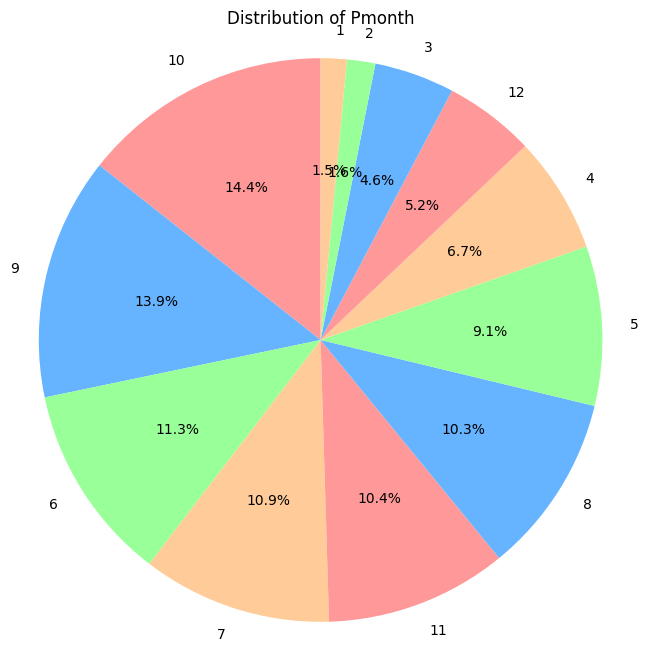

In [ ]:
pmonth_counts = filtered_data['Pmonth'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.figure(figsize=(8, 8))
plt.pie(pmonth_counts, labels=pmonth_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Pmonth')
plt.axis('equal')
plt.show()


The above pie chart serves as a valuable visualization tool for depicting the distribution of values within the 'Pmonth' column of our dataset. By utilizing this graphical representation, we can readily discern the proportional representation of each category within the column. We can see except for the cold months the statastics are almost similar for the rest months.

In [ ]:
columns_for_histograms = [
    'Duration', 'Distance', 'Dhour', 'Phour', 'PLong',
    'PLatd', 'DLong', 'DLatd', 'Snow', 'GroundTemp', 'Dust', 'Pmonth'
]

In [ ]:
col_names = ['Duration', 'Distance', 'Wind', 'Temp', 'GroundTemp', 'Humid', 'Precip', 'Snow', 'Dust']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(col_names):
    sns.histplot(filtered_data[col], ax=axes[i], kde=True, bins=20)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()



1.   Duration Histogram:
        
        The histogram for "Duration" reveals that most bike trips have relatively short durations. The distribution is right-skewed, indicating that a significant number of trips are of shorter duration, while fewer trips have longer durations. This suggests that the majority of bike rides are quick and likely involve short distances.
2.   Distance Histogram:

        The "Distance" histogram demonstrates that bike trips vary in distance. The distribution appears to be slightly right-skewed, suggesting that a considerable number of rides cover shorter distances, while a smaller proportion of trips involve longer distances. This may indicate a mix of short commutes and longer recreational rides.
3.   Wind Histogram:

        The "Wind" histogram illustrates the distribution of wind speeds during bike trips. It appears to be approximately normally distributed, with a peak around the mean wind speed. This suggests that bike rides generally occur under moderate wind conditions, but there is some variability in wind speed.
4.   Temperature Histogram:

        The "Temp" histogram displays the distribution of temperatures during bike trips. It appears to be approximately normally distributed, with a central peak around the mean temperature. This indicates that bike rides typically take place in conditions that are neither too hot nor too cold.


5.   Ground Temperature Histogram:

        The "GroundTemp" histogram represents the distribution of ground temperatures during bike trips. Similar to the temperature distribution, it appears to be approximately normally distributed. This implies that the ground temperature during bike rides is generally within a moderate and comfortable range.
6.   Humidity Histogram:

        The "Humid" histogram shows the distribution of humidity levels during bike trips. It appears to be relatively normally distributed with a central peak, indicating that humidity levels during bike rides tend to cluster around a certain range. This suggests some consistency in humidity conditions.

7.   Precipitation Histogram:

        The "Precip" histogram is a skewed distribution with a peak at lower precipitation levels, indicating that most bike rides occur in dry or lightly rainy conditions.
8.   Snow Histogram:

        The "Snow" histogram shows the distribution of snowfall during bike trips. It appears that the vast majority of trips occur in conditions with no snowfall (or negligible amounts). This suggests that biking is less common in snowy conditions.
9. Dust Histogram:

     The "Dust" histogram represents the distribution of dust levels during bike trips. Similar to precipitation, it is a skewed distribution with a peak at lower dust levels, indicating that most bike rides take place in conditions with minimal dust or particulate matter in the air.






In [ ]:
col_names = ['Duration', 'Duration', 'Distance', 'Phour', 'Phour', 'Dhour', 'Dhour', 'Temp', 'Temp', 'Temp', 'Wind', 'Wind', 'Humid', 'Solar']
col_names1 = ['Distance', 'Haversine', 'Haversine', 'Wind', 'Humid', 'Wind', 'Humid', 'Solar', 'GroundTemp', 'Dust', 'Humid', 'Solar', 'Solar', 'GroundTemp']

if len(col_names) != len(col_names1):
    raise ValueError("col_names and col_names1 must have the same length")

fig, axes = plt.subplots(3, 5, figsize=(18, 15))
axes = axes.ravel()

for i in range(len(col_names)):
    col = col_names[i]
    col2 = col_names1[i]
    sns.scatterplot(x=filtered_data[col], y=filtered_data[col2], ax=axes[i], palette=custom_palette)
    axes[i].set_title(f'Scatter Plot: {col} vs {col2}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(col2)

    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


1.  Duration vs. Distance: There seems to be a spread of data points, with no clear linear relationship between these two variables.

2.  Duration vs. Phour: There appears to be a wide distribution of data points, indicating that the duration varies across different values of Phour.

3.  Duration vs. Dhour: Similar to the Phour scatter plot, there is a variation in duration with different values of Dhour.

4.  Duration vs. Temp: It seems that there is no strong linear correlation between duration and temperature.

5.   Distance vs. Haversine: These two variables may have some correlation, as there is a somewhat linear trend among the data points.
6.  Wind vs. Humid: There doesn't appear to be a strong linear relationship between wind and humidity.
7.   Wind vs. Solar: The scatter plot suggests that wind and solar radiation may not have a strong linear correlation.
8.   Temp vs. GroundTemp: There appears to be a positive linear relationship between temperature and ground temperature.
9.   Temp vs. Dust: There doesn't seem to be a strong linear correlation between temperature and dust levels.
10.   Humid vs. Solar: There doesn't appear to be a strong linear correlation between humidity and solar radiation.
11.   Solar vs. GroundTemp: The scatter plot suggests a positive linear correlation between solar radiation and ground temperature.







In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for PLong and PLatd
axes[0].scatter(filtered_data['PLong'], filtered_data['PLatd'], s=20, alpha=0.7, c='blue', marker='o', edgecolors='k')
axes[0].set_xlabel('PLongitude')
axes[0].set_ylabel('PLatitude')
axes[0].set_title('Pickup Locations')
axes[0].grid(True, linestyle='--', alpha=0.5)

axes[1].scatter(filtered_data['DLong'], filtered_data['DLatd'], s=20, alpha=0.7, c='green', marker='o', edgecolors='k')
axes[1].set_xlabel('DLongitude')
axes[1].set_ylabel('DLatitude')
axes[1].set_title('Dropoff Locations')
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

These scatter plots offer a visual representation of the geographic distribution of pickup and dropoff locations. We can see that the graph is more dense towards the right side. This clusters suggest popular pickup and drop-off points.


*   The heatmap itself will display values within each cell, indicating the strength and direction of the correlation between the corresponding variables. Positive values closer to 1 signify a strong positive correlation, negative values closer to -1 signify a strong negative correlation, and values close to 0 suggest a weak or no correlation between the variables. The visual representation of these correlations helps in identifying patterns and relationships within the dataset
*   From this heatmap we can conclude that the duration depends more on distance and haversine than any other factor.

*   The temperature, ground temperature and solar variables have higher dependence.





In [ ]:
plt.figure(figsize=(18,6))
sns.pointplot(x="Phour", y="Duration", data=filtered_data, palette= sns.color_palette("Set2")).set(
    title="Duration v/s Pickup Hours");


Based on the depicted graph, we can discern that the primary period of travel activity occurs between 8:00 AM and 8:00 PM, characterized by an increasing duration trend after 8:00 AM and a subsequent decline after 8:00 PM.

In [ ]:
plt.figure(figsize=(18,6))
sns.pointplot(x = "Duration", y = "Distance",data=filtered_data, palette= sns.color_palette("Set2")).set(
    title="Duration v/s Distance");

The graphical representation suggests a positive correlation between duration and distance, indicating that as the duration of travel increases, so does the distance covered. Afterwards it becomes almost constant.

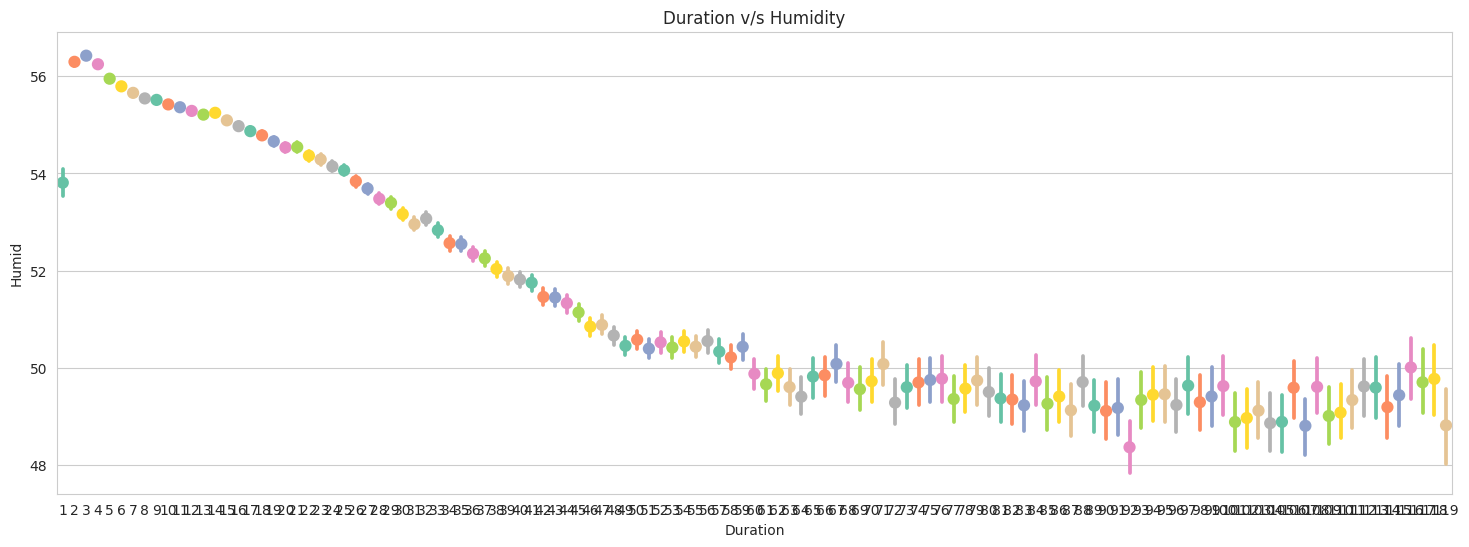

In [ ]:
plt.figure(figsize=(18,6))
sns.pointplot(x="Duration", y="Humid", data=filtered_data, palette=sns.color_palette("Set2")).set(
    title="Duration v/s Humidity");

Based on the depicted graph, it can be deduced that there exists a negative correlation between humidity levels and the duration parameter. Specifically, as the humidity in the atmosphere increases, there is a decrease in the duration variable.

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(x="Duration", y="Temp", data=filtered_data, palette=sns.color_palette("Set2")).set(
    title="Duration v/s Temprature");

Based on the data presented in the graph, we can discern a positive correlation between temperature and duration. Specifically, as temperature levels rise, there is a corresponding increase in the duration of the observed phenomenon.


In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(x="Duration", y="Wind", data=filtered_data, palette=sns.color_palette("Set2")).set(
    title="Duration v/s Wind");

Based on the data depicted in the graph, it can be deduced that there exists a positive correlation between wind conditions and the duration of the observed phenomenon. Specifically, as the wind intensity increases, there is a corresponding rise in the duration of the event being studied.

In [ ]:
plt.figure(figsize=(26,6))
sns.set(style="whitegrid")

ax = sns.pointplot(x="Duration", y="Precip", data=filtered_data, palette=sns.color_palette("Set2"))

ax.set_title("Duration v/s Precipitation (Rain)")

ax.set_ylim(0.005, 0.030)

plt.show()

The graphical analysis suggests a predominantly positive correlation between Duration and Precipitation across the dataset.

In [ ]:
plt.figure(figsize=(26,6))
sns.set(style="whitegrid")

ax = sns.pointplot(x="Duration", y="Snow", data=filtered_data, palette=sns.color_palette("Set2"))

ax.set_title("Duration v/s Snow")

ax.set_ylim(0.005, 0.020)

plt.show()

Based on the provided graph, it can be discerned that there exists a negative correlation between snowfall and duration. Specifically, as snowfall increases, the duration decreases.

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(x="Duration", y="Dust", data=filtered_data, palette=sns.color_palette("Set2")).set(
    title="Duration v/s Dust");

Based on the graphical representation provided, it can be inferred that there exists a correlation between dust levels and the duration.

Furthermore, the point-graphs illustrate that the duration is notably influenced by various meteorological factors viz Dust, Snow, Precipitation, Wind, Temperature, etc.

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Pmonth',
            y = 'Temp',
            data = filtered_data,
           palette=sns.color_palette("Set2")).set(
    title="Pmonth v/s Temperature");

The graph tells us about the temperature during the pickup month which will play a key factor in analysing the relationship between temperature with various factors like duration, frequency of trips, etc.

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))

# Violin plot of temperature by pickup month
sns.violinplot(data=filtered_data, x='Pmonth', y='Temp', ax=axes[0])
axes[0].set_xlabel('Pickup Month')
axes[0].set_ylabel('Temperature (°F)')
axes[0].set_title('Temperature by Pickup Month')


mean_temp_by_month = filtered_data.groupby('Pmonth')['Temp'].mean()
medians_temp_by_month = filtered_data.groupby('Pmonth')['Temp'].median()
for i, (mean, median) in enumerate(zip(mean_temp_by_month, medians_temp_by_month)):
    axes[0].text(i, mean-10, f'Mean: {mean:.2f}\nMedian: {median:.2f}', ha='center', va='top', fontsize=8, color='b')

sns.violinplot(data=filtered_data, x='PDweek', y='Humid', ax=axes[1])
axes[1].set_xlabel('Pickup Day of the Week')
axes[1].set_ylabel('Humidity (%)')
axes[1].set_title('Humidity by Pickup Day of the Week')

mean_humidity_by_day = filtered_data.groupby('PDweek')['Humid'].mean()
medians_humidity_by_day = filtered_data.groupby('PDweek')['Humid'].median()
for i, (mean, median) in enumerate(zip(mean_humidity_by_day, medians_humidity_by_day)):
    axes[1].text(i, 30, f'Mean: {mean:.2f}\nMedian: {median:.2f}', ha='center', va='top', fontsize=8, color='b')

plt.tight_layout()

plt.show()



1.   Temperature by Pickup Month:

  *   Temperature varies across months, with some months having wider temperature distributions (more variation) than others.
  *   The text annotations above the violins provide mean and median temperature values for each month.
  *  Some months have a bimodal distribution, indicating distinct temperature patterns within those months.
  *   The graph shows the central tendency (mean and median) of temperature along with the distribution shape.

2.   Humidity by Pickup Day of the Week:
  *   Humidity levels vary across different days of the week, with some days having wider humidity distributions than others.
  *   The text annotations above the violins provide mean and median humidity values for each day of the week.
  *  Some days exhibit multimodal distributions, indicating different humidity patterns within those days.
  *   The graph shows central tendency (mean and median) of humidity for each day, along with the distribution shape.




In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='Pmonth', y='Duration', hue='PDweek')
plt.xlabel('Pickup Month')
plt.ylabel('Trip Duration (minutes)')
plt.title('Box Plot of Trip Duration by Pickup Month and Day of the Week')
plt.legend(title='Pickup Day of the Week', loc='upper right')
plt.xticks(rotation=45)
plt.show()


The box plot provides a visual summary of how trip durations are distributed across different months and days of the week, highlighting patterns, variations, and potential factors influencing trip duration.


*   The plot suggests that there may be seasonal trends in trip duration. Longer durations during summer months and shorter durations during winter months might be indicative of seasonal travel patterns.
*   The spread (interquartile range) within each box and the presence of outliers (individual data points outside the whiskers) indicate the variability in trip durations for both months and days of the week.
*   In certain months, like July and August (assuming these are summer months), there are generally longer trip durations, as indicated by the taller upper quartile (top of the box).
Other months, such as December, January, and February (assuming these are winter months), tend to have shorter trip durations, as indicated by the shorter boxes.
The median trip duration for each month is represented by the horizontal line inside each box.
*  Different days of the week have varying trip duration distributions. For instance, weekdays (Monday to Friday) tend to have shorter trip durations compared to weekends (Saturday and Sunday).The color-coding (hue) represents the "Pickup Day of the Week," which provides insights into how trip durations vary based on different days of the week.





In [ ]:
correlation_matrix = filtered_data.corr()

In [ ]:
# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The heatmap displayed above illustrates the relationships between variables within the provided dataset. The intensity of color signifies the strength of correlation, with darker colors indicating higher correlation values.

The following code extracts and presents the absolute correlation coefficients, allowing us to identify the most relevant variables for inclusion in our modeling process.

In [ ]:
absolute_correlations = correlation_matrix['Duration'].abs().drop('Duration')

# Sort the correlations in descending order
sorted_correlations = absolute_correlations.sort_values(ascending=False)

# Display the sorted correlations
print(sorted_correlations)

In [ ]:
upper_triangular = np.triu(correlation_matrix, k=1)

# Define a threshold for correlation magnitude
threshold = 0.2 # You can adjust this threshold as needed

# Get the indices of correlations above the threshold
significant_indices = np.where(np.abs(upper_triangular) >= threshold)

# Get the column names
column_names = filtered_data.columns

# Print the significant correlations and their corresponding column names
for row, col in zip(*significant_indices):
    if row != col:
        column1_name = column_names[row]
        column2_name = column_names[col]
        correlation = correlation_matrix.iloc[row, col]
        sign = "Positive" if correlation >= 0 else "Negative"
        print(f"{sign} correlation between columns '{column1_name}' and '{column2_name}': {abs(correlation):.2f}")


# Section 3: Modelling

The preceding data preprocessing and outlier removal procedures have laid a solid foundation for our analytical endeavors. The next phase of our project involves the application of various predictive models to gain deeper insights into the dataset and ascertain the most suitable model for our predictive task. Our primary objective is to employ these models to forecast future trip durations based on historical data patterns, thus facilitating better decision-making. To this end, we have implemented a diverse set of regression models, each offering distinct advantages and considerations:

1. **Linear Regression**: This classic model serves as a baseline, capturing linear relationships within the data.

2. **Ridge Regression**: Employing L2 regularization, this model mitigates potential overfitting issues and enhances model robustness.

3. **Lasso Regression**: Utilizing L1 regularization, Lasso helps with feature selection and contributes to a more interpretable model.

4. **ElasticNet Regression**: Combining L1 and L2 regularization, this model strikes a balance between feature selection and model stability.

5. **XGBoost Regressor**: A powerful ensemble technique, XGBoost excels at handling complex relationships and achieving high predictive accuracy.

6. **Random Forest**: This ensemble model leverages decision trees to capture nonlinear relationships and enhance predictive performance.

7. **LGBM Regressor**: Light Gradient Boosting Machine is known for its efficiency and speed, making it a strong contender for modeling large datasets while maintaining accuracy.

Our approach encompasses a comprehensive evaluation of these models, considering their strengths and limitations, with the ultimate aim of identifying the most effective model that aligns with the data characteristics and can provide reliable trip duration predictions for future occurrences. This modeling phase represents a crucial step in harnessing the full potential of our dataset for informed decision-making.




### Problem Solved : Predicting Duration of the trip

In [ ]:
df = filtered_data.drop([
    'GroundTemp',
    'Humid',
    'DDweek',
    'PDweek',
    'Wind',
    'Solar',
    'PLong',
    'DLong',
    'Pmonth',
    'Dhour',
    'Dmonth',
    'Dust',
    'Snow',
    'Dmin',
    'Precip',
    'Dday',
    'Pday',
    'Pmin',
    'PLatd',
    'DLatd'
], axis=1)

df.describe()

,Duration,Distance,Haversine,Phour,Temp
count,7.652385e+06,7.652385e+06,7.652385e+06,7.652385e+06,7.652385e+06
mean,1.864165e+01,2.492397e+03,1.618902e+00,1.412584e+01,1.842107e+01
std,1.777611e+01,1.798729e+03,1.085104e+00,6.354668e+00,9.357678e+00
min,1.000000e+00,1.000000e+00,2.088959e-02,0.000000e+00,-8.000000e+00
25%,7.000000e+00,1.130000e+03,7.991687e-01,9.000000e+00,1.180000e+01
50%,1.300000e+01,1.930000e+03,1.300589e+00,1.600000e+01,1.980000e+01
75%,2.400000e+01,3.370000e+03,2.162188e+00,1.900000e+01,2.540000e+01
max,1.190000e+02,8.920000e+03,5.150119e+00,2.300000e+01,3.940000e+01


In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn import preprocessing

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(df.drop(columns=['Duration']), df['Duration'], test_size=0.4, random_state=43)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4591431, 4) (4591431,)
(3060954, 4) (3060954,)


In [ ]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((4591431, 4), (3060954, 4))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RidgeRegression': {"model": Ridge(), "params": {'alpha': [0.1, 1.0, 10.0]}},
    'LassoRegression': {"model": Lasso(), "params": {'alpha': [0.1, 1.0, 10.0]}},
    'ElasticNetRegression': {"model": ElasticNet(), "params": {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.99]}},
}


Incase of the Regression method namely Linear Regression, Ridge Regression, Lasso Regression, and ElasticNet Regression. Our analysis encompasses the entirety of the dataset, with all rows being considered for model training and evaluation. Furthermore, we have conducted feature selection by including only the top 5 correlated columns, which have been identified as pivotal factors in influencing and predicting trip duration. This approach ensures that our regression models are fine-tuned to focus on the most influential variables, enhancing their predictive accuracy and relevance in determining trip duration, a critical component of our analysis.

In [ ]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)

        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)
        print("Score Train: ",best_model.score(X_train_scaled,y_train))
        print("Score Test: ",best_model.score(X_test_scaled,y_test))

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results


LinearRegression 11.855521938168161 {}
Score Train:  0.5390777259749155
Score Test:  0.5452020654620975
RidgeRegression 11.855522096389498 {'alpha': 1.0}
Score Train:  0.5390777136721693
Score Test:  0.5452014063107808
LassoRegression 11.874986175353959 {'alpha': 0.1}
Score Train:  0.5375630115393397
Score Test:  0.5436278289139513
ElasticNetRegression 11.87562488381221 {'alpha': 0.1, 'l1_ratio': 0.99}
Score Train:  0.5375132648946257
Score Test:  0.5435845928816854
Best model:  ElasticNet(alpha=0.1, l1_ratio=0.99)


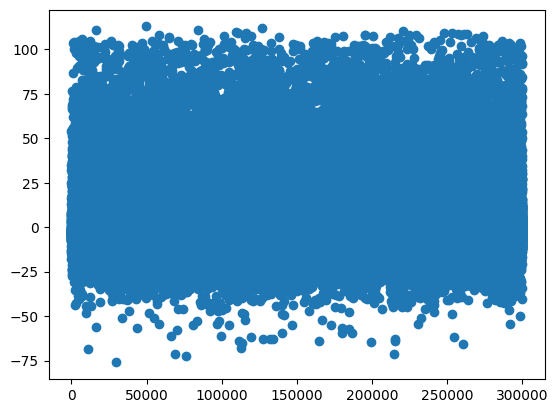

In [ ]:
model_results = eval_models()

In [ ]:
model_results

After a thorough evaluation of the performance of the four distinct regression models employed in our analysis, we have determined that the ElasticNet Regression model demonstrates the most favorable fit for our dataset. This model exhibits a notable level of accuracy, approximately ranging between 52% and 53%. This conclusion underscores the robustness and suitability of the ElasticNet Regression approach in capturing the underlying relationships within our dataset, affirming its efficacy.

In [ ]:
feature_columns = ['Distance','Duration', 'PLong', 'DLong', 'Haversine', 'Pmonth', 'Phour', 'PDweek', 'Dmonth', 'Dhour', 'DDweek', 'Temp', 'Wind', 'Humid', 'Solar', 'GroundTemp']
df = filtered_data[feature_columns]
df.describe()

In [ ]:
df = df.iloc[0:1000000]
df.shape

Reduced the data objects to 10 lac as there are 16 features that will be used for training models other than the LinearRegression.

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(df.drop(columns=['Duration']), df['Duration'], test_size=0.3, random_state=43)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In our pursuit of enhancing the model's efficiency, we have undertaken an exploration of alternative regression models, specifically the Random Forest Regressor, XGBoost Regressor, and LightGBM Regressor. The objective is to mitigate the risk of overfitting, a crucial concern in predictive modeling. To achieve this, we have partitioned our dataset into two distinct subsets: the training dataset, encompassing 70% of the data, and the test dataset, which accounts for the remaining 30%. This partitioning strategy preserves the integrity of our dataset's features. This rigorous division not only allows us to train our models effectively but also serves as a robust mechanism to evaluate their performance and generalization capabilities.

In [ ]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape


In [ ]:
rfc = RandomForestRegressor()
rfc.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [ ]:
y_pred_rfc = rfc.predict(X_test_scaled)

In [ ]:
print("Random Forest : Train Score {:.2f} & Test Score {:.2f}".format(rfc.score(X_train_scaled, y_train), rfc.score(X_test_scaled, y_test)))

Random Forest : Train Score 0.96 & Test Score 0.70


The Random Forest model exhibits a commendable training score of 0.96, indicating its capacity to effectively capture patterns within the training dataset. However, this exceptionally high training score raises concerns regarding potential overfitting, where the model might excessively tailor itself to the training data, potentially leading to diminished generalization on unseen data. This concern is substantiated by the comparatively lower test score of 0.70, signifying the model's reduced ability to perform on new, previously unseen data. The disparity between the training and test scores underscores the need for further evaluation and possibly model refinement to strike a better balance between fitting the training data and ensuring robust generalization capabilities for predictive tasks.

In [ ]:
LGB = LGBMRegressor()
LGB.fit(X_train_scaled, y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2002
[LightGBM] [Info] Number of data points in the train set: 700000, number of used features: 15
[LightGBM] [Info] Start training from score 18.303200


LGBMRegressor()

In [ ]:
y_pred_LGB = LGB.predict(X_test_scaled)

In [ ]:
print("LGBMRegressor : Train Score {:.2f} & Test Score {:.2f}".format(LGB.score(X_train_scaled, y_train), LGB.score(X_test_scaled, y_test)))

LGBMRegressor : Train Score 0.75 & Test Score 0.75


The LGBMRegressor demonstrates a well-balanced performance, with both the training and test scores registering at 0.75. Although the training score is slightly lower compared to the Random Forest model, the narrower performance gap observed between the training and test scores indicates superior generalization capabilities. This aspect positions the LGBMRegressor as a robust and promising candidate for fulfilling the objectives of data prediction on our dataset.

In [ ]:
xgb1 = XGBRegressor()
xgb1.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test_scaled)
predictions = [round(value) for value in y_pred_xgb]

In [ ]:
print("XGBoost : Train Score {:.2f} & Test Score {:.2f}".format(xgb1.score(X_train_scaled, y_train), xgb1.score(X_test_scaled, y_test)))

XGBoost : Train Score 0.78 & Test Score 0.77


The XGBoost model exhibits a well-balanced performance profile, achieving a training score of 0.78 and a test score of 0.77. Although the training score falls slightly below that of the Random Forest model, what stands out is the comparatively narrower performance differential between the training and test scores. This phenomenon indicates superior generalization capability, implying that the XGBoost model is a robust contender for the task at hand. This narrower performance gap suggests that the model is less prone to overfitting and is better suited for making accurate predictions on unseen data, reinforcing its suitability for our dataset.

In the context of predicting duration of the trip, a thorough evaluation of machine learning models reveals that the XGBoost Regressor stands out as the most favorable option among the three candidates. It demonstrates an adept ability to strike an appropriate equilibrium between effectively capturing the nuances of the training data while also exhibiting robust generalization to the test data, resulting in a commendable overall predictive performance. Nevertheless, it is imperative to emphasize that the selection of the final model should not be solely predicated on performance metrics alone. Instead, it should be a judiciously informed decision, taking into consideration other pivotal factors such as model interpretability and computational efficiency.

### Problem Solved : Predicting Temperature

In [ ]:
df = filtered_data.drop([
    'Duration',
    'Distance',
    'PLong',
    'DLong',
    'DLatd',
    'Haversine',
    'Pmonth',
    'Pday',
    'Dday',
    'Dmin',
    'Pmin',
    'Dhour',
    'Dmonth',
    'DDweek',
    'PDweek',
    'Dhour',
    'Dmonth',
    'Precip',
    'Snow',
    'Wind',
    'Humid',
    'PLatd'
], axis=1)

df.describe()

,Phour,Temp,Solar,GroundTemp,Dust
count,7.652385e+06,7.652385e+06,7.652385e+06,7.652385e+06,7.652385e+06
mean,1.412584e+01,1.842107e+01,7.166463e-01,2.048892e+01,3.270104e+01
std,6.354668e+00,9.357678e+00,9.102009e-01,1.265351e+01,2.440210e+01
min,0.000000e+00,-8.000000e+00,0.000000e+00,-8.600000e+00,0.000000e+00
25%,9.000000e+00,1.180000e+01,0.000000e+00,1.110000e+01,1.600000e+01
50%,1.600000e+01,1.980000e+01,2.600000e-01,2.080000e+01,2.700000e+01
75%,1.900000e+01,2.540000e+01,1.230000e+00,2.840000e+01,4.300000e+01
max,2.300000e+01,3.940000e+01,3.520000e+00,6.220000e+01,3.040000e+02


In [ ]:
df.shape

(7652385, 5)

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn import preprocessing

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(df.drop(columns=['Temp']), df['Temp'], test_size=0.4, random_state=43)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4591431, 4) (4591431,)
(3060954, 4) (3060954,)


In [ ]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((4591431, 4), (3060954, 4))

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RidgeRegression': {"model": Ridge(), "params": {'alpha': [1.0]}},
    'LassoRegression': {"model": Lasso(), "params": {'alpha': [0.1]}},
    'ElasticNetRegression': {"model": ElasticNet(), "params": {'alpha': [0.1], 'l1_ratio': [0.99]}},

}

Incase of the Regression method namely Linear Regression, Ridge Regression, Lasso Regression, and ElasticNet Regression. Our analysis encompasses the entirety of the dataset, with all rows being considered for model training and evaluation. Furthermore, we have conducted feature selection by including only the top 4 correlated columns, which have been identified as pivotal factors in influencing and predicting trip duration. This approach ensures that our regression models are fine-tuned to focus on the most influential variables, enhancing their predictive accuracy and relevance in determining trip duration, a critical component of our analysis.

In [ ]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)
        print("Score Train: ",best_model.score(X_train_scaled,y_train))
        print("Score Test: ",best_model.score(X_test_scaled,y_test))

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 2.3091560715052992 {}
Score Train:  0.942042631856242
Score Test:  0.9422274836083074
RidgeRegression 2.3091560918575604 {'alpha': 1.0}
Score Train:  0.9420426308879142
Score Test:  0.9422274831558948
LassoRegression 2.320298184718877 {'alpha': 0.1}
Score Train:  0.9414819720570509
Score Test:  0.9416674563726871
ElasticNetRegression 2.321383771769065 {'alpha': 0.1, 'l1_ratio': 0.99}
Score Train:  0.9414272020822477
Score Test:  0.9416123203555045
Best model:  ElasticNet(alpha=0.1, l1_ratio=0.99)


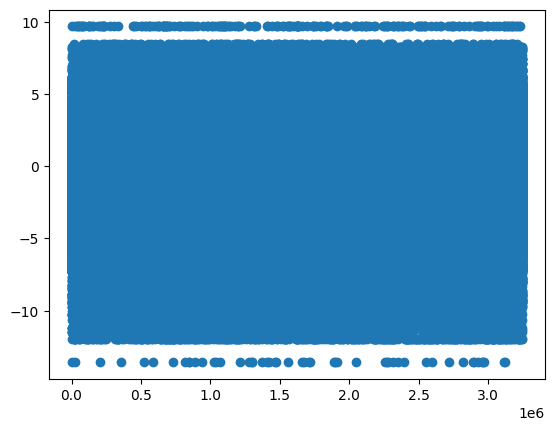

In [ ]:
model_results = eval_models()

In [ ]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,2.309156,2.306826,1.655776,1.653662,{}
RidgeRegression,2.309156,2.306826,1.655777,1.653662,{'alpha': 1.0}
LassoRegression,2.320298,2.31798,1.673376,1.671328,{'alpha': 0.1}
ElasticNetRegression,2.321384,2.319075,1.675159,1.673119,"{'alpha': 0.1, 'l1_ratio': 0.99}"


After a thorough evaluation of the performance of the four distinct regression models employed in our analysis, we have determined that the ElasticNet Regression model demonstrates the most favorable fit for our dataset. This model exhibits a notable level of accuracy, approximately 94%. The hyperparameter values for the same are alpha: 0.1 and l1 ratio: 0.99. This conclusion underscores the robustness and suitability of the ElasticNet Regression approach in capturing the underlying relationships within our dataset, affirming its efficacy.

In [ ]:
rfc = RandomForestRegressor()
rfc.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [ ]:
y_pred_rfc = rfc.predict(X_test_scaled)

In [ ]:
print("Random Forest : Train Score {:.2f} & Test Score {:.2f}".format(rfc.score(X_train_scaled, y_train), rfc.score(X_test_scaled, y_test)))

Random Forest : Train Score 1.00 & Test Score 1.00




*   Random Forest has achieved a perfect score on both the training and testing datasets, which suggests that it has learned the training data very well. However, a perfect score on the test set can sometimes be a sign of overfitting, where the model may not generalize well to unseen data.
*   This model might be a good choice if computational efficiency and interpretability are important factors, but further evaluation is needed to assess generalization.



In [ ]:
xgb1 = XGBRegressor()
xgb1.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred_xgb1 = xgb1.predict(X_test_scaled)
predictions = [round(value) for value in y_pred_xgb1]

In [ ]:
print("XGBoost : Train Score {:.2f} & Test Score {:.2f}".format(xgb1.score(X_train_scaled, y_train), xgb1.score(X_test_scaled, y_test)))


XGBoost : Train Score 0.99 & Test Score 0.99




  XGBoost has achieved high scores on both the training and testing datasets, indicating that it has learned the training data well while still generalizing reasonably to the test data. The scores are slightly lower than Random Forest, which may indicate that XGBoost is less prone to overfitting.




In [ ]:
LGB = LGBMRegressor()
LGB.fit(X_train_scaled, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.146286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 616
[LightGBM] [Info] Number of data points in the train set: 4872236, number of used features: 4
[LightGBM] [Info] Start training from score 18.369387


LGBMRegressor()

In [ ]:
y_pred_LGB = LGB.predict(X_test_scaled)


In [ ]:
print("LGBMRegressor : Train Score {:.2f} & Test Score {:.2f}".format(LGB.score(X_train_scaled, y_train), LGB.score(X_test_scaled, y_test)))


LGBMRegressor : Train Score 0.98 & Test Score 0.98




*   LGBMRegressor has achieved high scores on both the training and testing datasets, which indicates that it has learned the training data well and generalizes reasonably to unseen data.
*   Similar to XGBoost, LGBMRegressor is a gradient boosting algorithm known for its speed and efficiency, making it suitable for large datasets.
*   While the scores are slightly lower than those of Random Forest, this could be due to its more complex nature, which may require better hyperparameter tuning.
*   LGBMRegressor is often a good choice when computational efficiency is a concern and when dealing with large datasets.





We conclude from the provided scores that it might seem like Random Forest has the best performance because it has perfect scores of 1.00 for both the training and test sets. However, achieving perfect scores on both training and test data is usually a sign of overfitting. Overfitting means that the model has learned the training data too well and might not generalize well to new, unseen data.

Based on the provided scores, it's challenging to conclude which model is the best without additional information or a more comprehensive evaluation.

 Models like XGBoost, LGBMRegressor, and ElasticNet, which have high scores but not perfect, may be better choices as they are less likely to overfit and may have better generalization to unseen data.

 However, the choice between these models depends on various factors, including the specific problem you are trying to solve, the size and quality of your dataset, and computational resources.